In [50]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Ruta del archivo CSV
archivo_csv = './train.csv'

# Leer el archivo CSV usando un DataFrame de pandas
df = pd.read_csv(archivo_csv)

m_por_n = 2400  # Cambia este valor a cualquier número positivo para reducir, o -1 para no reducir
# 2402 es la logitud de la lista minima que es toys (y quero unsar el -1)

# Crear un diccionario con la estructura deseada y reducir las listas si m_por_n no es -1
diccionario_reducido = {}
for categoria, imagenes in df.groupby('label')['image_name']:
    if m_por_n == -1:
        diccionario_reducido[categoria] = imagenes.tolist()
    else:
        num_imagenes = len(imagenes)
        m = min(m_por_n, num_imagenes)  # Conservar mínimo entre m_por_n y el número de imágenes en la categoría
        diccionario_reducido[categoria] = imagenes[:m].tolist()

In [52]:
def aplicar_descriptor_orb(categoria, nombre):
    resultado = 0
    
    ruta_imagen = f'./images/{categoria}/{nombre}'
    
    if "png" in nombre:
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)
    else:
        imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    # imagen = mpimg.imread(ruta_imagen)
    #imagen = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR)
    
    # Pasamos a gris
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Inicializar el detector ORB
    orb = cv2.ORB_create()
    
    # Encontrar keypoints y descriptores ORB en la imagen
    keypoints, descriptores_orb = orb.detectAndCompute(imagen_gris, None)
    try:
        lista_rutas_imagen = [ruta_imagen] * descriptores_orb.shape[0]
    except:
        lista_rutas_imagen = []
        resultado = -1
    
    return lista_rutas_imagen, keypoints, descriptores_orb, imagen_gris, resultado


In [53]:
lista_ruta = []
lista_descriptores = []

for key in diccionario_reducido.keys():
    for imagen in diccionario_reducido[key]:
        lista_rutas_imagen, _, descriptors, _, resultado  = aplicar_descriptor_orb(key, imagen)
        if resultado == 0:
            lista_ruta += lista_rutas_imagen
            lista_descriptores.append(descriptors)

# Eliminar los elementos None de la lista
lista_de_elementos_filtrada = [elemento for elemento in lista_descriptores if elemento is not None]

# Concatenar los elementos en una lista resultante
if lista_de_elementos_filtrada:
    lista_resultante = np.concatenate(lista_de_elementos_filtrada, axis=0)
    print("Forma de la lista resultante:", lista_resultante.shape)  # Debería ser (m, 128)
else:
    print("No hay elementos válidos para concatenar.")

Forma de la lista resultante: (101441, 32)


In [54]:
lista_de_elementos_filtrada[40]

array([[ 57,  13, 123, ..., 130,  96, 168],
       [ 39, 169,  99, ..., 134, 246, 229],
       [  3, 142,   2, ...,  14, 185, 221],
       ...,
       [ 94,  22, 238, ..., 111,  61,  87],
       [ 65,  27, 185, ..., 243,  64, 121],
       [133, 167, 121, ..., 128, 197, 113]], dtype=uint8)

In [55]:
descriptors.shape[0]

184

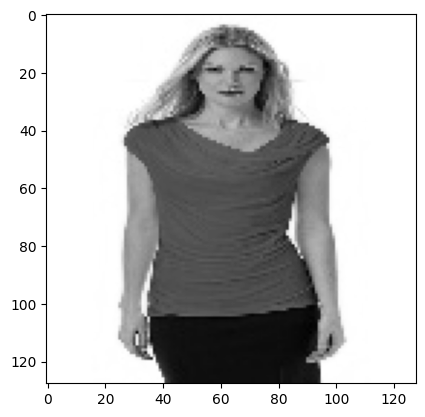

In [56]:
# 2411
categoria = "apparel"
nombre = "image6479.jpg"

# plt.imshow(imagen)

_,_,descriptor_busqueda, imagen, _ = aplicar_descriptor_orb(categoria, nombre)
plt.imshow(imagen, cmap='gray')

In [57]:
from sklearn.neighbors import NearestNeighbors

# Crear un modelo de k-NN
knn_model = NearestNeighbors(n_neighbors=5)  # Buscar los 5 vecinos más cercanos # Poner distancia Hamming
knn_model.fit(lista_resultante)  # Ajustar el modelo a los descriptores

# Función para encontrar los vecinos más cercanos para un descriptor dado
def find_nearest_neighbors(descriptor, k = 10):
    descriptor_flat = descriptor.flatten()
    # Encontrar los índices y distancias de los vecinos más cercanos
    distances, indices = knn_model.kneighbors([descriptor_flat], k)  # Obtener k vecinos más cercanos
    return distances, indices

mas_cercano = ""
distancia_minima = np.Inf
for descriptor in descriptor_busqueda:
    distances, indices = find_nearest_neighbors(descriptor, 1)
    # print(distances, indices)
    if distances[0][0] < distancia_minima:
        distancia_minima = distances[0]
        mas_cercano = lista_ruta[indices[0][0]]
print(mas_cercano)

./images/meme/image1406.jpeg


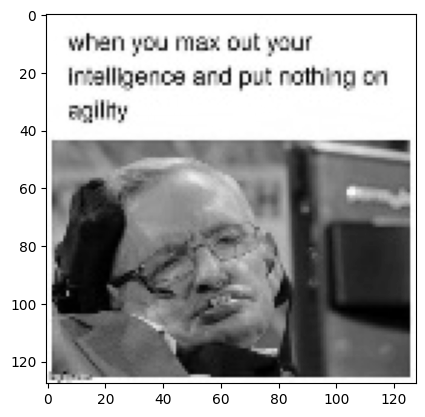

In [59]:
# 2411
categoria = "meme"
nombre = "image1406.jpeg"

# plt.imshow(imagen)

_,_,descriptor_busqueda, imagen, _ = aplicar_descriptor_orb(categoria, nombre)
plt.imshow(imagen, cmap='gray')